# Precios de la vivienda - Técnicas avanzadas de regresión

Base de datos https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code

Esta base de datos contiene información sobre varias características de viviendas y sus precios de venta.



En este notebook se presentan varias técnicas de regresión con el objetivo de estudiar y elegir cual de estas técnicas logra dar una mejor estimación sobre la predicción del precio de venta de una vivienda según sus características.

In [1]:
# Se importan las librerías necesarias para el análisis y procesamiento del dataframe 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Lasso,OrthogonalMatchingPursuit
from sklearn.linear_model import Ridge,GammaRegressor,HuberRegressor
from sklearn.linear_model import LinearRegression,PoissonRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

sns.set(style='whitegrid', context='notebook')

%matplotlib inline
import warnings
from warnings import filterwarnings

In [2]:
# Se carga de dataframe de entrenamiento train.csv 
df_train = pd.read_csv('train.csv')
#df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# Se carga de dataframe de prueba test.csv
df_test = pd.read_csv('test.csv')
#df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# Se carga de dataframe de muestra sample_submission.csv
d_muestra = pd.read_csv('sample_submission.csv')
#d_muestra = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

# Dimensiones del dataframe
print('Las dimensiones del dataframe son: ',df_train.shape)
df_train.head()

Las dimensiones del dataframe son:  (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Información sobre las características del dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Con el fin de observar la correlación entre las variables y determinar cuales son las que tienen mayor relación con el precio de venta, se grafica una matriz de mapa de calor 

<AxesSubplot:>

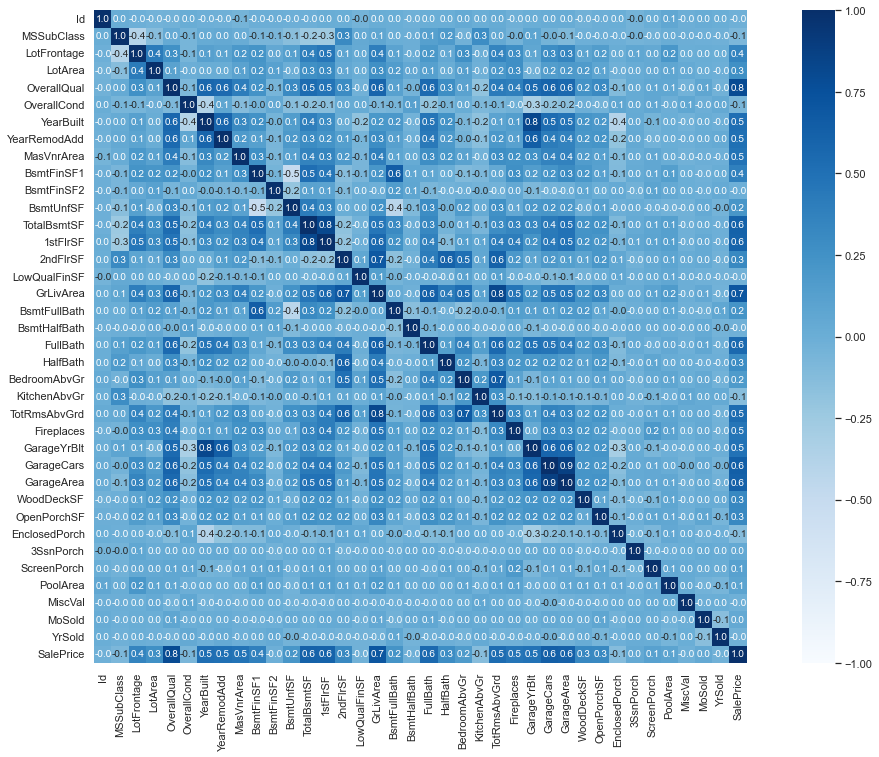

In [5]:
# Analisis correlacional
plt.subplots(figsize=(20,12))
sns.heatmap(df_train.corr(), cmap="Blues", annot=True, vmin=-1, vmax=1, fmt='.1f', square = True)

Se puede apreciar que las variables con mayor correlación con el precio de venta son OverallQual  y GrLivArea.  

Se grafica la distribución de los precios de venta de las viviendas

C:\Users\57301\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


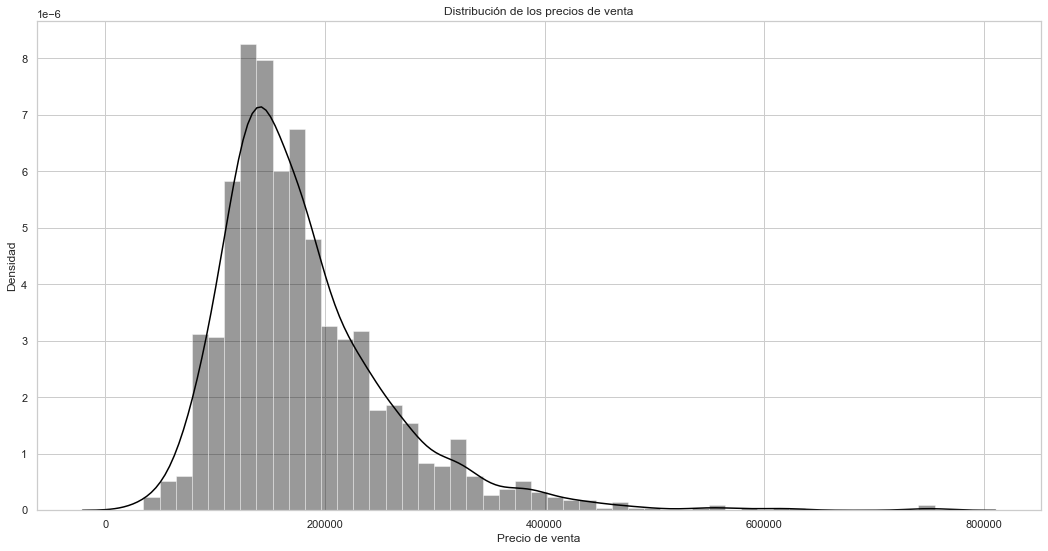

In [6]:
f, ax = plt.subplots(figsize=(18,9))
sns.distplot(df_train['SalePrice'], color="black")
ax.set(xlabel="Precio de venta")
ax.set(ylabel="Densidad")
ax.set(title="Distribución de los precios de venta")
plt.show()

C:\Users\57301\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


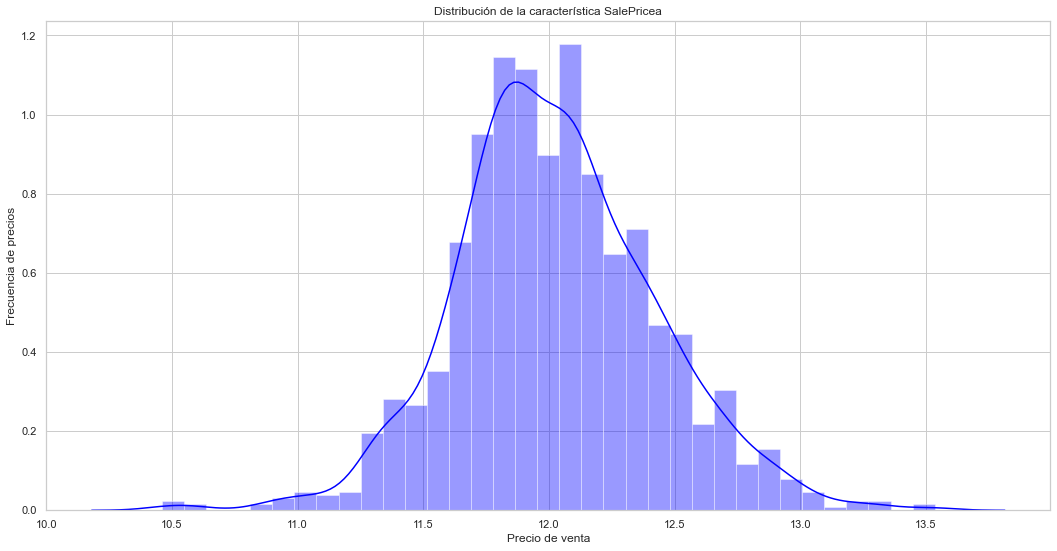

In [7]:
# Se normaliza la distribución 
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

f, ax = plt.subplots(figsize=(18,9))
sns.distplot(df_train['SalePrice'], color="blue")
ax.set(ylabel="Frecuencia de precios")
ax.set(xlabel="Precio de venta")
ax.set(title="Distribución de la característica SalePricea")
plt.show()

Ahora se realiza el preprocesamiento de los datos. Para ello comenzamos verificando la cantidad de datos nulos de cada variable. 

In [8]:
# Se muestran las columnas y el total de datos nulos en cada una de ellas
print('las columnas con datos nulos superiores a 500 son : ', list(df_train.columns[df_train.isnull().sum()>500]))
print()
print(list(df_train.isnull().sum()))

las columnas con datos nulos superiores a 500 son :  ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

[0, 0, 0, 259, 0, 0, 1369, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 37, 37, 38, 37, 0, 38, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 690, 81, 81, 81, 0, 0, 81, 81, 0, 0, 0, 0, 0, 0, 0, 1453, 1179, 1406, 0, 0, 0, 0, 0, 0]


In [9]:
# Procesamiento de datos nulos en df_train
for i in df_train.columns:
    if df_train[i].dtype == np.float:
        df_train[i].fillna(df_train[i].median(),inplace=True)  # Se reemplazan los datos nulos por la mediana  
    elif df_train[i].dtype == 'object':
        df_train[i].fillna(df_train[i].mode()[0],inplace=True)  # Se reemplazan los datos nulos por la moda
    elif df_train[i].isnull().sum() > 500:
        df_train.drop(columns=[i],axis=1)  # Se eliminan las columnas con valores nulos superiores a 500

In [10]:
# Se transforman la variables categóricas en numericas en df_train
le = LabelEncoder()
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        df_train[i] = le.fit_transform(df_train[i])

In [11]:
# Se transforman la variables categóricas en numericas en df_test
le = LabelEncoder()
for i in df_test.columns:
    if df_test[i].dtype == 'object':
        df_test[i] = le.fit_transform(df_test[i])

In [12]:
# Procesamiento de datos nulos en df_test
for i in df_test.columns:
    if df_test[i].dtype == np.float:
        df_test[i].fillna(df_test[i].median(),inplace=True)  # Se reemplazan los datos nulos por la mediana  
    elif df_test[i].dtype == 'object':
        df_test[i].fillna(df_test[i].mode()[0],inplace=True)  # Se reemplazan los datos nulos por la moda
    elif df_test[i].isnull().sum() > 500:
        df_test.drop(columns=[i],axis=1)  # Se eliminan las columnas con valores nulos superiores a 500

In [13]:
# Dimensiones de los datos de entrenamiento y prueba  
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

 Entrenamiento de los modelos

In [14]:
# función para las métricas de evaluación de los modelos  
def evaluation(y,predictions):
    mae = mean_absolute_error(y,predictions)  # error absoluto medio
    mse = mean_squared_error(y,predictions)  # error cuadrático medio 
    rmse = np.sqrt(mean_squared_error(y,predictions)) # raiz del error cuadrático medio
    return mae,mse,rmse

In [15]:
# Separación de datos de entrenamiento y prueba   
X, y = df_train.drop(columns=['Id','SalePrice']),df_train['SalePrice']
#X_test = df_test.drop(columns=['Id'])

In [16]:
# Estandarización 
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
# Regresor de vector de soporte SVR
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=799,test_size=0.2)
svr = SVR()
svr.fit(X_train,y_train)
ypred = svr.predict(X_test)
acc_svr = r2_score(y_test,ypred)
mae,mse,rmse = evaluation(y_test,ypred)
print("r_squared :",acc_svr.round(6))
print("")
print("Raiz del error cuadrático medio rmse :",rmse.round(6))
print("")
print("Error cuadrático medio mse :",mse.round(6))
print("")
print("Error absoluto medio mae :",mae.round(6))

r_squared : 0.797381

Raiz del error cuadrático medio rmse : 0.160955

Error cuadrático medio mse : 0.025907

Error absoluto medio mae : 0.102739


In [18]:
# Regresión lineal  
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=804,test_size=0.2)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
ypred1 = lin_reg.predict(X_test)
acc_rl = r2_score(y_test,ypred1)
mae,mse,rmse = evaluation(y_test,ypred1)
print("r_squared :",acc_rl.round(6))
print("")
print("Raiz del error cuadrático medio rmse :",rmse.round(6))
print("")
print("Error cuadrático medio mse :",mse.round(6))
print("")
print("Error absoluto medio mae :",mae.round(6))

r_squared : 0.895238

Raiz del error cuadrático medio rmse : 0.12379

Error cuadrático medio mse : 0.015324

Error absoluto medio mae : 0.089703


In [19]:
# Regresión Lasso   
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=804,test_size=0.2)
lasso = Lasso()
lasso.fit(X_train,y_train)
ypred2 = lasso.predict(X_test)
acc_lasso = r2_score(y_test,ypred2)
mae,mse,rmse = evaluation(y_test,ypred2)
print("r_squared :",acc_lasso.round(6))
print("")
print("Raiz del error cuadrático medio rmse :",rmse.round(6))
print("")
print("Error cuadrático medio mse :",mse.round(6))
print("")
print("Error absoluto medio mae :",mae.round(6))

r_squared : -0.024098

Raiz del error cuadrático medio rmse : 0.387038

Error cuadrático medio mse : 0.149798

Error absoluto medio mae : 0.305578


In [20]:
# Regresor de Poission
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=804,test_size=0.2)
poisson = PoissonRegressor()
poisson.fit(X_train,y_train)
ypred3 = poisson.predict(X_test)
acc_poission = r2_score(y_test,ypred3)
mae,mse,rmse = evaluation(y_test,ypred3)
print("r_squared :",acc_poission.round(6))
print("")
print("Raiz del error cuadrático medio rmse :",rmse.round(6))
print("")
print("Error cuadrático medio mse :",mse.round(6))
print("")
print("Error absoluto medio mae :",mae.round(6))

r_squared : 0.895833

Raiz del error cuadrático medio rmse : 0.123438

Error cuadrático medio mse : 0.015237

Error absoluto medio mae : 0.089616


In [21]:
# Regresor de Aumento de gradiente
np.random.seed(1182)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1182,test_size=0.2) # Did it for 2000 epochs
gbr = GradientBoostingRegressor(alpha=0.9, criterion='mse', max_depth=100,max_leaf_nodes=7, min_samples_leaf=4,n_estimators=250)
gbr.fit(X_train,y_train)
ypred4 = gbr.predict(X_test)
acc_gra = r2_score(y_test,ypred4)
mae,mse,rmse = evaluation(y_test,ypred4)
print("r_squared :",acc_gra.round(6))
print("")
print("Raiz del error cuadrático medio rmse :",rmse.round(6))
print("")
print("Error cuadrático medio mse :",mse.round(6))
print("")
print("Error absoluto medio mae :",mae.round(6))

r_squared : 0.913915

Raiz del error cuadrático medio rmse : 0.116541

Error cuadrático medio mse : 0.013582

Error absoluto medio mae : 0.080245


In [22]:
# Regresor KNeighbours
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=804,test_size=0.2)
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
ypred5 = knr.predict(X_test)
acc_kn = r2_score(y_test,ypred5)
mae,mse,rmse = evaluation(y_test,ypred5)
print("r_squared :",acc_kn.round(6))
print("")
print("Raiz del error cuadrático medio rmse :",rmse.round(6))
print("")
print("Error cuadrático medio mse :",mse.round(6))
print("")
print("Error absoluto medio mae :",mae.round(6))

r_squared : 0.80095

Raiz del error cuadrático medio rmse : 0.170633

Error cuadrático medio mse : 0.029116

Error absoluto medio mae : 0.119944


In [23]:
# Regresor Gamma
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=804,test_size=0.2)
gmr = GammaRegressor()
gmr.fit(X_train,y_train)
ypred6 = gmr.predict(X_test)
acc_gamma = r2_score(y_test,ypred6)
mae,mse,rmse = evaluation(y_test,ypred6)
print("r_squared :",acc_gamma.round(6))
print("")
print("Raiz del error cuadrático medio rmse :",rmse.round(6))
print("")
print("Error cuadrático medio mse :",mse.round(6))
print("")
print("Error absoluto medio mae :",mae.round(6))

r_squared : 0.874304

Raiz del error cuadrático medio rmse : 0.135595

Error cuadrático medio mse : 0.018386

Error absoluto medio mae : 0.095893


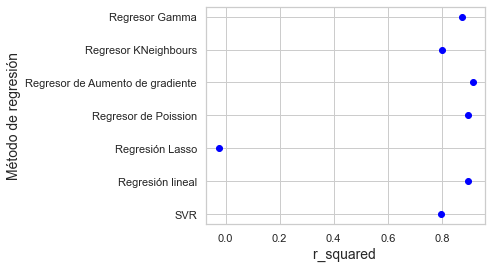

In [24]:
# Se grafican lo metodos de regresion con sus respectivos r2_score o r_squared
plt.subplots(figsize=(5,4))
y = ['SVR','Regresión lineal', 'Regresión Lasso','Regresor de Poission', 'Regresor de Aumento de gradiente', 'Regresor KNeighbours', 'Regresor Gamma']
x = [acc_svr, acc_rl, acc_lasso, acc_poission, acc_gra, acc_kn, acc_gamma]
plt.scatter(x, y,color='blue', marker='o')
plt.xlabel('r_squared ', fontsize=14) 
plt.ylabel('Método de regresión', fontsize=14) 
plt.show()

De los modelos de regresión aplicados, el de aumento del gradiente ajusta mejor a la predicción de los precios de las viviendas con un r_squared = 0.91. Se utiliza este método para realizar la predicción de los precios de vivienda del dataframe de prueba

In [25]:
# Estandarización 
sc_test = sc.fit_transform(df_test.drop(columns=['Id'],axis=1))

# Prediccion de los precios de vivienda untilizando el modelo de aumento del gradiente y el dataset de prueba

prediccion = np.expm1(gbr.predict(sc_test)) # se transforman los datos a su escala original
prediccion

array([123503.1031114 , 154578.51191036, 191479.60272563, ...,
       149089.34700604, 121415.97201563, 231365.64459641])

In [26]:
# creacion del dataframe con las predicciones finales
ids = df_test['Id']
predicciones = pd.DataFrame({"Id":ids,"SalePrice":prediccion})
predicciones

,Id,SalePrice
0,1461,123503.103111
1,1462,154578.511910
2,1463,191479.602726
3,1464,198229.381981
4,1465,176083.970020
...,...,...
1454,2915,77576.645090
1455,2916,79089.085980
1456,2917,149089.347006
1457,2918,121415.972016


In [27]:
# se guarda el dataframe con los precios predichos con el modelo de aumento del gradiente
predicciones.to_csv('submission.csv', index=False)